In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tsp import TSP
from tsp import City
import numpy as np

In [3]:
def create_cities_from_coords_file(coords_file):
    coords = np.loadtxt(coords_file, dtype=float, delimiter=" ")
    cities = []
    for coord in coords:
        cities.append(City(coord[0], coord[1]))
        
    return np.array(cities)

In [4]:
cities = create_cities_from_coords_file("cities10.txt")

In [5]:
cities[3]

City: (20.0, 26.0)

In [6]:
cities[4]

City: (40.0, 30.0)

In [7]:
cities[3].dist(cities[4])

20.396078054371138

In [8]:
population = []
for i in range(1000):
    population.append(TSP(cities))

print(population[3])

In [9]:
# TSP1 = population[3]
# TSP2 = population[0]

In [10]:
# TSP1.array_of_cities

In [11]:
# TSP2.array_of_cities

In [12]:
# C1, C2 = TSP1.crossover(TSP2)

In [13]:
# C1.array_of_cities

In [18]:
import time
from IPython import display
%matplotlib inline
import matplotlib.pyplot as plt

def evo(Pop, iterations):
    for i in range(iterations):
        Pop.calculate_fitness()
        if i%10 == 0:
            print(i)
            Pop.sort_pop()
            display.clear_output(wait=True)
            x, y = Pop.population[0].get_array_of_coordinates()
            plt.clf()
            plt.plot(x, y)
            display.display(plt.gcf())
            
            
#             if Pop.population[0].fitness > -1.0:
#                 break
#             else:
            print(Pop.population[0].fitness)
        Pop.reproduction({"type":"tournament", "n_competitors": 50}, keep_parents=True, keep_n_best=10)
        Pop.mutate()
    return Pop

In [21]:
from population import Population
Pop = Population(population, 10, 80, crossover_type="assexual")
Pop.calculate_fitness()
Pop.population[0].fitness

-276.9053936638126

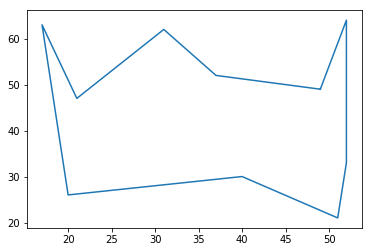

-188.62022351036902


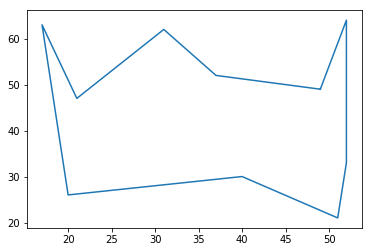

In [22]:
Pop = evo(Pop, 1000)